In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# Using free and open source tools, provide a set of choropleth visualizations for each of the columns containing
# dates such that the resulting visualizations (48 states only) tell the story by conveying through color, texture,
# or both the time lines of achievement of each milestone/column in the provided dataset. Missing data are of
# particular interest in that when a state has never achieved a given milestone, that should be indicated in a
# standout manner such as cross-hatching. Consider that the publication may be grayscale. Provide a solution for that
# as well. Provide the titles, labels, and legends necessary for clarification. File support is given as follows:
# SturmCodebook has the explanation. SturmData is the data CSV.

In [3]:
sturm_df = pd.read_csv('SturmData_csv_2.txt')
sturm_df

,state,fips,icpsr,debtfree,effectivemwpa,earnings,wills,soletrader
0,AL,1,41,1846.0,NaN,1887.0,NaN,NaN
1,AR,5,42,1835.0,1873.0,1873.0,1868.0,1868.0
2,AZ,4,61,1864.0,1871.0,1973.0,NaN,1871.0
3,CA,6,71,1850.0,1872.0,1872.0,1874.0,1872.0
4,CO,8,62,1861.0,1861.0,1861.0,1874.0,1874.0
5,CT,9,1,1845.0,1877.0,1877.0,1809.0,1877.0
6,DE,10,11,1865.0,1873.0,1873.0,NaN,NaN
7,FL,12,43,1845.0,1943.0,1892.0,1823.0,NaN
8,GA,13,44,1868.0,1873.0,1861.0,1867.0,NaN
9,IA,19,31,1846.0,1873.0,1873.0,NaN,1873.0


,State,scalerank,featurecla,adm1_code,geometry
0,MN,2,Admin-1 scale rank,USA-3514,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,MT,2,Admin-1 scale rank,USA-3515,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,ND,2,Admin-1 scale rank,USA-3516,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,ID,2,Admin-1 scale rank,USA-3518,"POLYGON ((-111.04973 44.48816, -111.05025 42.0..."
4,WA,2,Admin-1 scale rank,USA-3519,"POLYGON ((-116.99807 46.33017, -116.90653 46.1..."


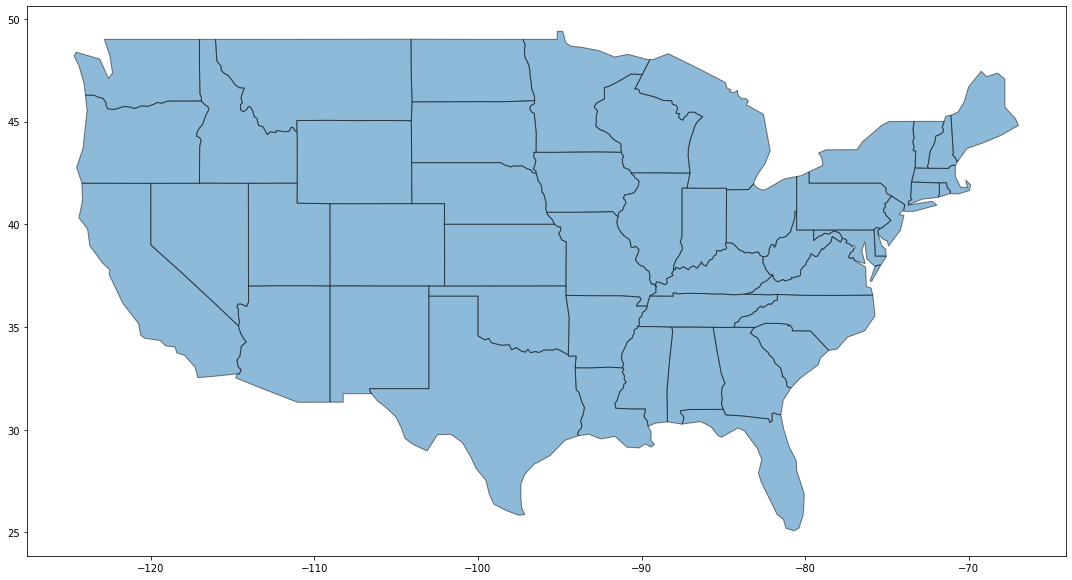

In [4]:
df_states=gpd.read_file('48_states_geo_json.txt')

display(df_states.head())

ax=df_states.plot(figsize=(15,9), alpha=0.5, edgecolor='k')
plt.tight_layout()
plt.show()

In [5]:
# Merge the two datasets

merged_df = df_states.set_index('State').join(sturm_df.set_index('state'))

display(merged_df.head())

,scalerank,featurecla,adm1_code,geometry,fips,icpsr,debtfree,effectivemwpa,earnings,wills,soletrader
State,,,,,,,,,,,
MN,2,Admin-1 scale rank,USA-3514,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",27,33,1866.0,1869.0,1869.0,1869.0,1874.0
MT,2,Admin-1 scale rank,USA-3515,"POLYGON ((-111.19419 44.56116, -111.29155 44.7...",30,64,1864.0,1887.0,1887.0,NaN,1874.0
ND,2,Admin-1 scale rank,USA-3516,"POLYGON ((-96.60136 46.35136, -96.53891 46.199...",38,36,1862.0,1877.0,NaN,1877.0,1877.0
ID,2,Admin-1 scale rank,USA-3518,"POLYGON ((-111.04973 44.48816, -111.05025 42.0...",16,63,1887.0,1903.0,1915.0,1887.0,1887.0
WA,2,Admin-1 scale rank,USA-3519,"POLYGON ((-116.99807 46.33017, -116.90653 46.1...",53,73,1860.0,1881.0,1881.0,1889.0,1889.0


<AxesSubplot:title={'center':'FIPS per State'}>

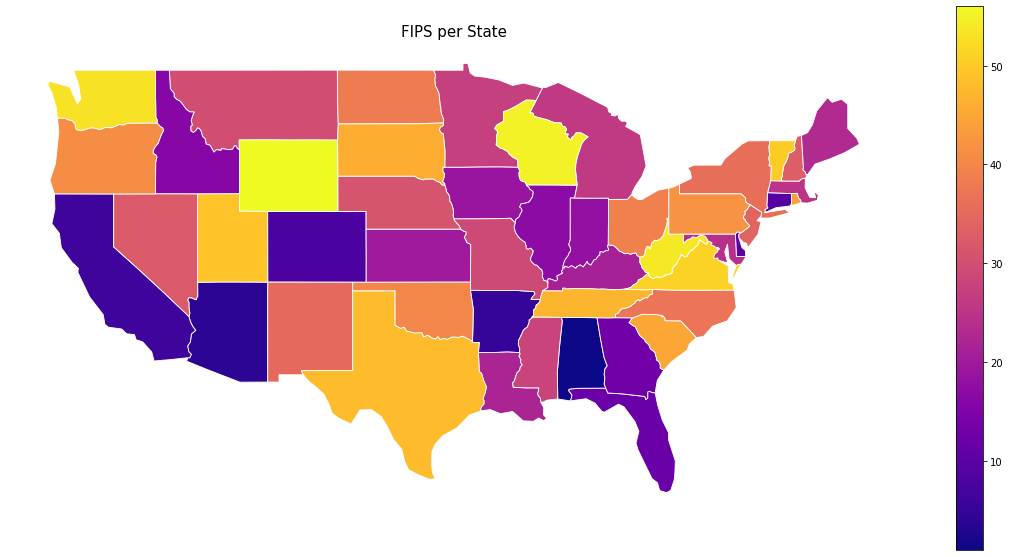

In [6]:
# Create a plot for fips

fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
ax.set_title('FIPS per State', fontdict={'fontsize': '15', 'fontweight' : '3'})

merged_df.plot(column='fips', cmap='plasma', linewidth=0.9, ax=ax, edgecolor='1', legend=True, 
               missing_kwds={"color": "b", "label": "Missing values",},)

<AxesSubplot:title={'center':'ICPSR per State'}>

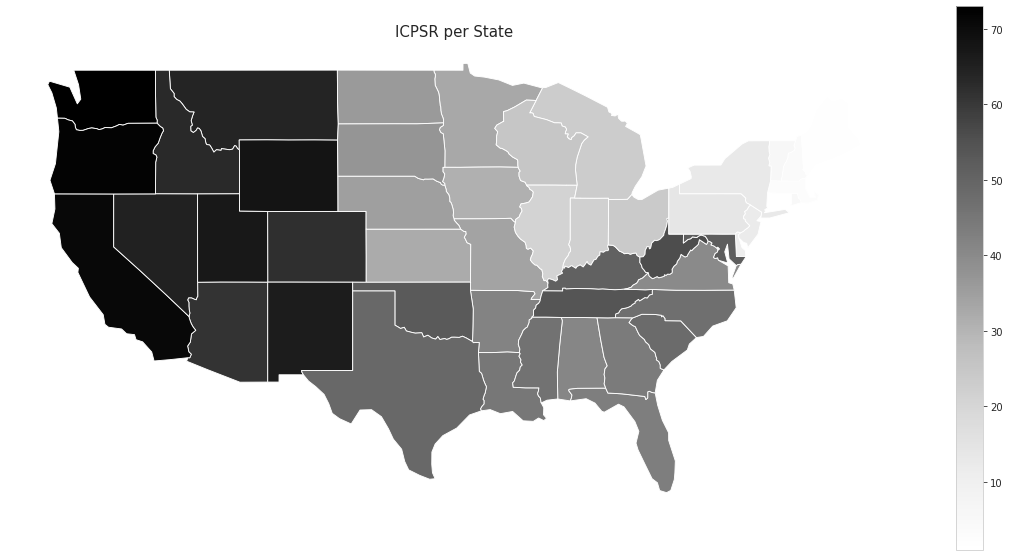

In [127]:
# Create a plot for icpsr

fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
ax.set_title('ICPSR per State', fontdict={'fontsize': '15', 'fontweight' : '3'})

merged_df.plot(column='icpsr', cmap='Greys', linewidth=0.9, ax=ax, edgecolor='1', legend=True, 
               missing_kwds={ "color": "w", "label": "Missing values",},)

<AxesSubplot:title={'center':'debtfree per State'}>

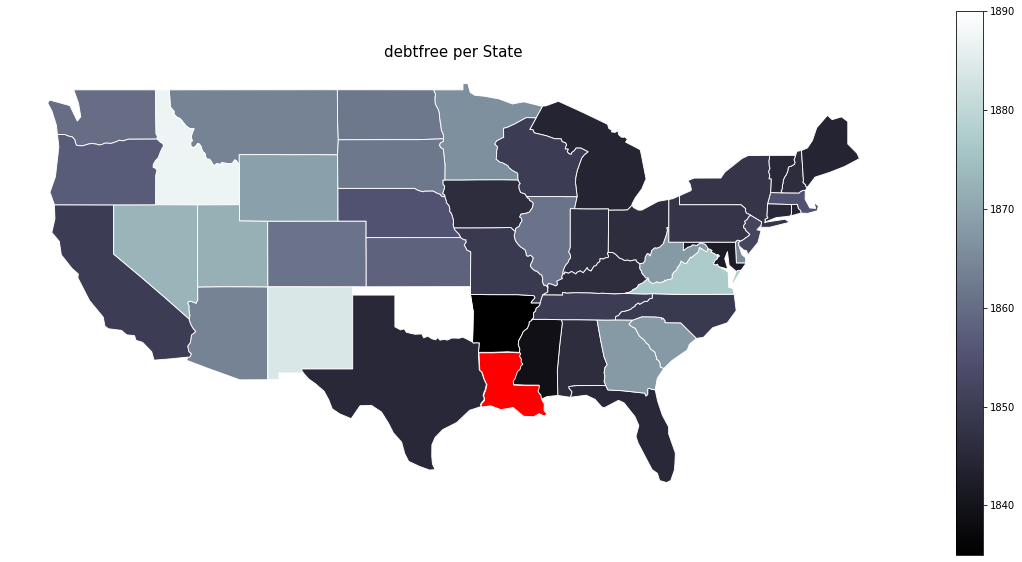

In [7]:
# Create a plot for debtfree

fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
ax.set_title('debtfree per State', fontdict={'fontsize': '15', 'fontweight' : '3'})

merged_df.plot(column='debtfree', cmap='bone', linewidth=0.9, ax=ax, edgecolor='1', legend=True, 
               missing_kwds={"color": "r", "label": "Missing values",},)

<AxesSubplot:title={'center':'earnings per State'}>

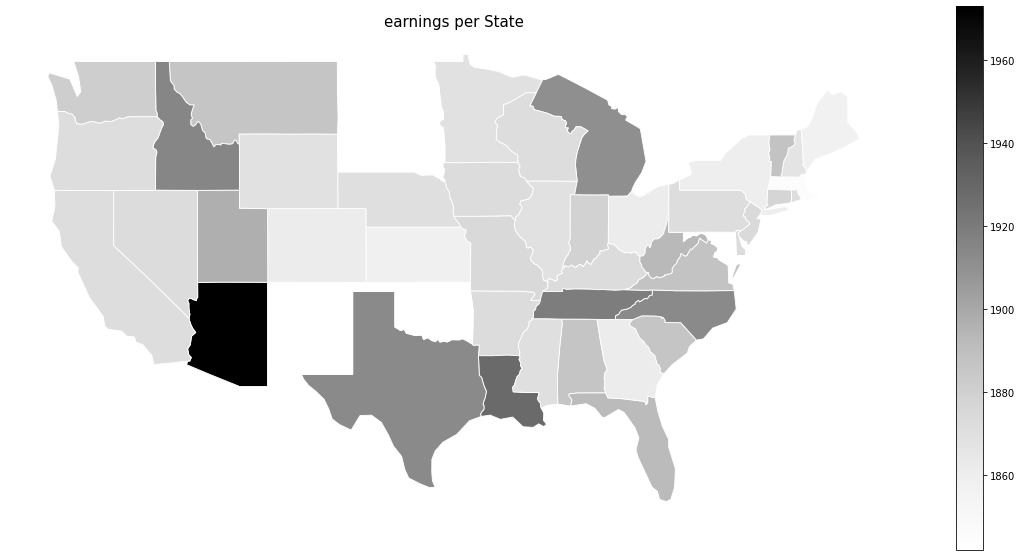

In [8]:
# Create a plot for earnings

fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
ax.set_title('earnings per State', fontdict={'fontsize': '15', 'fontweight' : '3'})

merged_df.plot(column='earnings', cmap='Greys', linewidth=0.9, ax=ax, edgecolor='1', legend=True, 
               missing_kwds={"color": "w", "label": "Missing values",},)

<AxesSubplot:title={'center':'effectivemwpa per State'}>

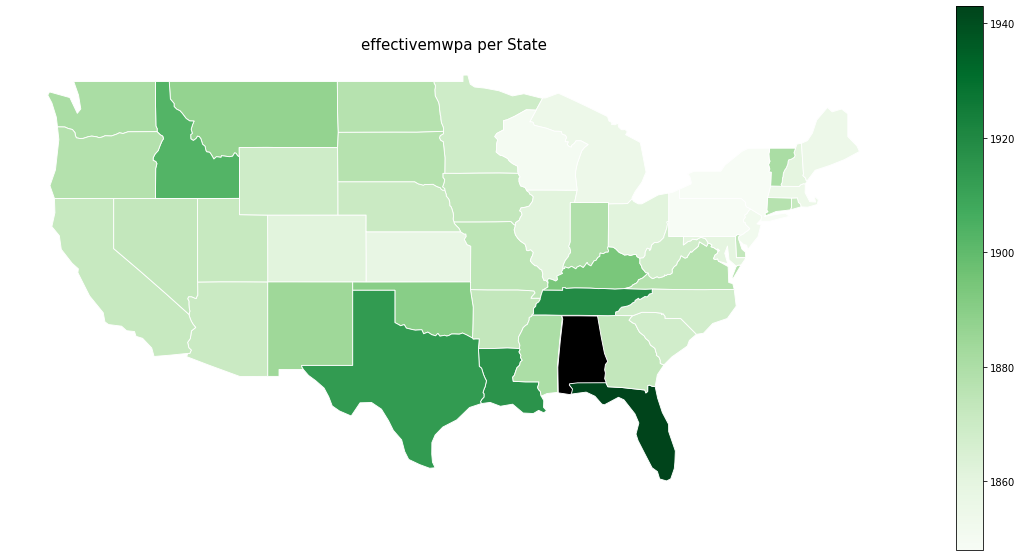

In [9]:
# Create a plot for effectivemwpa

fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
ax.set_title('effectivemwpa per State', fontdict={'fontsize': '15', 'fontweight' : '3'})

merged_df.plot(column='effectivemwpa', cmap='Greens', linewidth=0.9, ax=ax, edgecolor='1', legend=True, 
               missing_kwds={"color": "k", "label": "Missing values",},)

<AxesSubplot:title={'center':'wills per State'}>

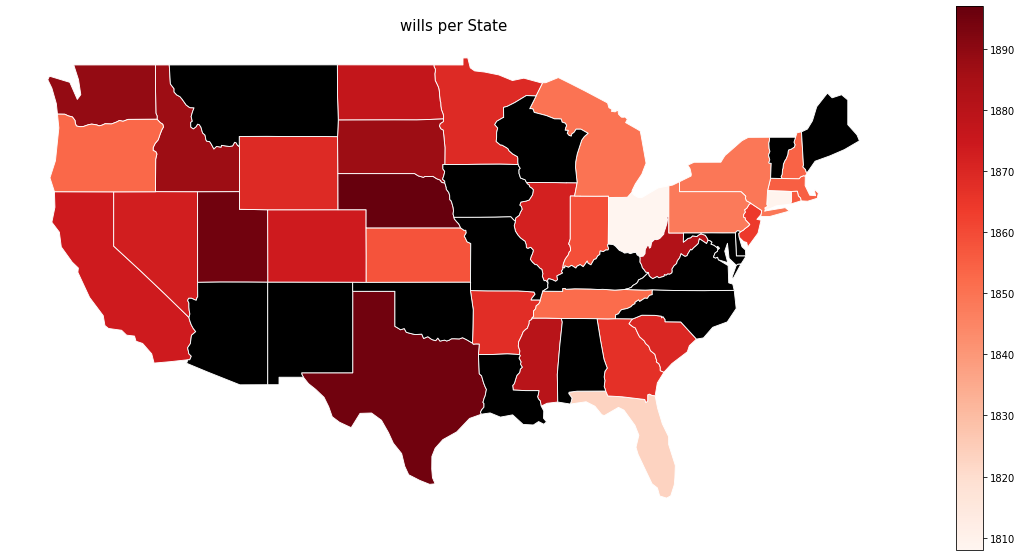

In [10]:
# Create a plot for wills

fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
ax.set_title('wills per State', fontdict={'fontsize': '15', 'fontweight' : '3'})

merged_df.plot(column='wills', cmap='Reds', linewidth=0.9, ax=ax, edgecolor='1', legend=True, 
               missing_kwds={"color": "k", "label": "Missing values",},)

<AxesSubplot:title={'center':'soletrader per State'}>

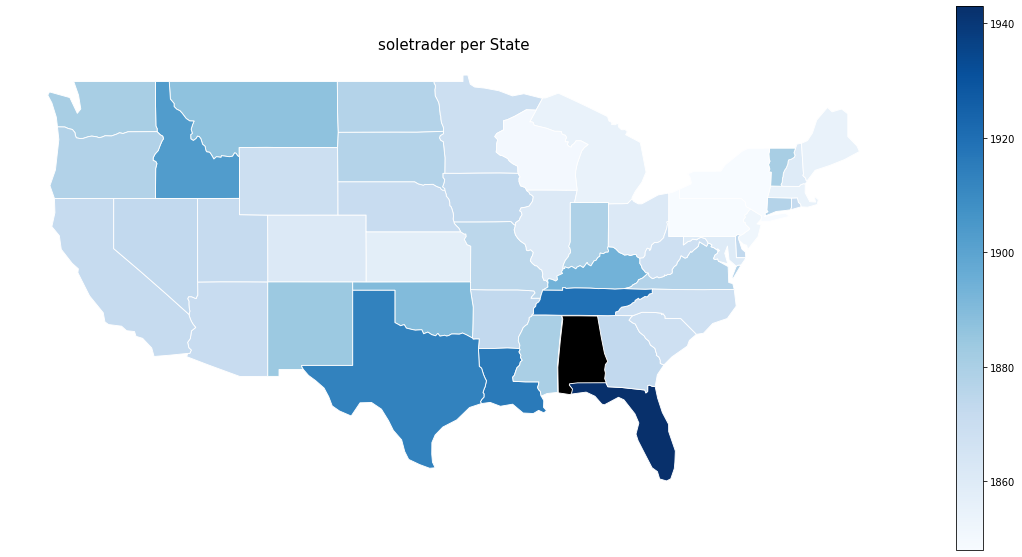

In [11]:
# Create a plot for soletrader

fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
ax.set_title('soletrader per State', fontdict={'fontsize': '15', 'fontweight' : '3'})

merged_df.plot(column='effectivemwpa', cmap='Blues', linewidth=0.9, ax=ax, edgecolor='1', legend=True, 
               missing_kwds={"color": "k", "label": "Missing values",},)